In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


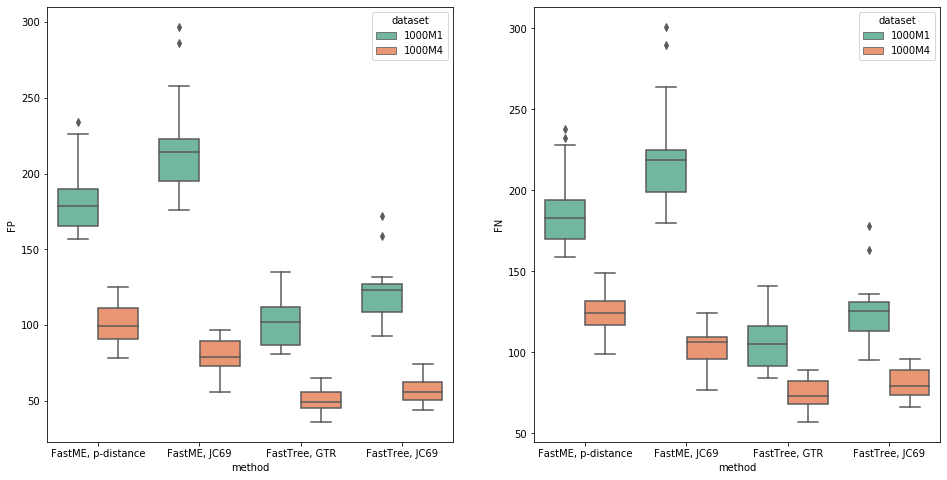

In [36]:
datasets = ['1000M1', '1000M4']
columns = ['method', 'repetition', 'FP', 'FN']

# read in results from FastME - BalME and NJ
prefix_bme, suffix_bme = 'FastME-TaxAdd_BalME/result_', '_fastme_taxadd.txt'
prefix_nj, suffix_nj = 'NJ/result_', '_nj.txt'

# read in results from FastTree - GTR and JC
prefix_ft, suffix_ft = 'FastTree/result_', '_fasttree.txt'

fig, ax = plt.subplots(1,2, figsize=(16,8))
i = 0
dataset_df = []
for d in datasets:
    bme_f = prefix_bme+d+suffix_bme
    nj_f = prefix_nj+d+suffix_nj
    ft_f = prefix_ft+d+suffix_ft

    bme = pd.read_csv(bme_f, names=columns, header=None)
    nj = pd.read_csv(nj_f, names=columns, header=None)
    ft = pd.read_csv(ft_f, names=columns, header=None)

    bme, nj, ft = bme[bme.FP != 'err'], nj[nj.FP != 'err'], ft[ft.FP != 'err']
    combined = pd.concat([bme, nj, ft], ignore_index=True)
    combined = combined[combined.method != 'K2P']
    combined.loc[combined.method == 'p-distance', 'method'] = 'FastME, p-distance'
    combined.loc[combined.method == 'JC69', 'method'] = 'FastME, JC69'
    combined.loc[combined.method == 'GTR', 'method'] = 'FastTree, GTR'
    combined.loc[combined.method == 'JC', 'method'] = 'FastTree, JC69'
    combined[['FP', 'FN']] = combined[['FP', 'FN']].apply(pd.to_numeric)
    combined['dataset'] = d
    dataset_df.append(combined)
    i += 1
combined_df = pd.concat(dataset_df, ignore_index=True)
sns.boxplot(x='method', y='FP', data=combined_df, hue='dataset', palette="Set2", ax=ax[0])
sns.boxplot(x='method', y='FN', data=combined_df, hue='dataset', palette="Set2", ax=ax[1])
    
#fig.text(0.04, 0.5, '', va='center', rotation='vertical')
fig.savefig("evaluation.jpg", dpi=300)
